<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Maria Paula Pérez Romo y José de Jesús Carbajal

**Fecha:** 12 de Marzo del 2025.

**Expediente** : 743859 y ..
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**:https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-4

# Tarea 4: Clase 11

## Enunciado de tarea (Transcibirlo)
Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:


### Ejercicio 1: 
El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.


Código de solución Maria Paula

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [9]:
df = pd.read_csv("data/Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Tenemos variables categoricas que se necesitan volver númericas, para eso aplicare un encoder.

In [10]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [11]:
le = LabelEncoder()
df["furnishingstatus"] = le.fit_transform(df["furnishingstatus"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0


In [12]:
le = LabelEncoder()
df["mainroad"] = le.fit_transform(df["mainroad"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,0


In [13]:
le = LabelEncoder()
df["guestroom"] = le.fit_transform(df["guestroom"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,0
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,0


In [14]:
le = LabelEncoder()
df["basement"] = le.fit_transform(df["basement"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,0
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,1
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,0


In [15]:
le = LabelEncoder()
df["hotwaterheating"] = le.fit_transform(df["hotwaterheating"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,0
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,1
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,0


In [16]:
le = LabelEncoder()
df["airconditioning"] = le.fit_transform(df["airconditioning"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,0


In [17]:
le = LabelEncoder()
df["prefarea"] = le.fit_transform(df["prefarea"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [18]:
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Listo, ya son todas variables númericas. Para poderle dar los datos a la red de una manera que pueda entender será necesario hacer alguna transformación a mis datos. 

In [19]:
X = df.drop(columns=['price'])
y = df['price'] #variable a predecir

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))



Hago un escalamiento ya que las redes neuronales son sensibles a las escalas de datos. Como el precio esta en un rango amplio, y hay otras variables que solo tienen valores pequeños, es mejor que normalize x para mejorar la estabilidad del entrenamiento.

In [22]:

model = Sequential([
    # Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    # Dropout(0.2),

    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(1) 
])

model.summary()


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, batch_size=100, validation_data=(X_test_scaled, y_test_scaled))


Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2380 - mae: 0.2306 - val_loss: 0.1856 - val_mae: 0.1529
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1878 - mae: 0.1599 - val_loss: 0.1735 - val_mae: 0.1366
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1726 - mae: 0.1405 - val_loss: 0.1703 - val_mae: 0.1337
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1633 - mae: 0.1233 - val_loss: 0.1714 - val_mae: 0.1414
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1562 - mae: 0.1173 - val_loss: 0.1614 - val_mae: 0.1297
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1512 - mae: 0.1135 - val_loss: 0.1499 - val_mae: 0.1142
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1454 - mae: 0.1117 - val_loss: 0.1442 - val_mae: 0.1109
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1375 - mae: 0.1036 - val_loss: 0.1431 - val_mae: 0.1172
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1333 - mae: 0.1005 -

In [24]:
y_pred_scaled = model.predict(X_test_scaled)  
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  

# Evaluar el error en la escala original
mae_real = np.mean(np.abs(y_test.values - y_pred)) 
print(f"MAE real en precios: {mae_real:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MAE real en precios: 989455.19


Matplotlib is building the font cache; this may take a moment.


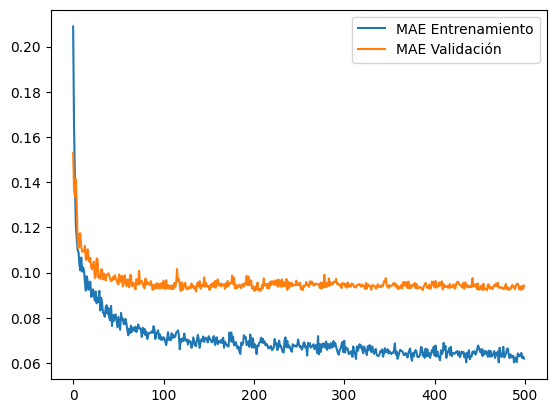

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MAE Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE Validación')
plt.legend()
plt.show()


In [28]:
df_pred = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicho': y_pred.flatten()})
print(df_pred.sample(3))


        Real    Predicho
71   5600000  5104286.50
93   5145000  3203143.25
103  5530000  5217440.00


No se ajusto de la mejor manera la red neuronal, pero creo que se obtuvieron resultados aceptables. Intente ponerle un mayor learning rate, un mayor dropout, y mayor epocas. El menor mae que pude conseguir fue 996269.76.

## Parte 2
Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

In [1]:
import os
import pandas as pd

In [13]:

folder_path = "data/australia"

# Obtener lista de archivos CSV en la carpeta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Leer y concatenar todos los CSV
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
df_concatenado = pd.concat(df_list, ignore_index=True)

# Guardar el resultado en un nuevo archivo CSV
df_concatenado.to_csv(os.path.join(folder_path, "csv_concatenado.csv"), index=False)

print(f"Se han concatenado {len(csv_files)} archivos en 'csv_concatenado.csv'")


Se han concatenado 68 archivos en 'csv_concatenado.csv'


In [14]:
df1 = pd.read_csv("data/australia/csv_concatenado.csv")
df1

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Unnamed: 0
0,NSW1,2020/03/01 00:30:00,6843.16,44.78,TRADE,NaN
1,NSW1,2020/03/01 01:00:00,6674.67,42.10,TRADE,NaN
2,NSW1,2020/03/01 01:30:00,6417.07,39.49,TRADE,NaN
3,NSW1,2020/03/01 02:00:00,6221.79,40.47,TRADE,NaN
4,NSW1,2020/03/01 02:30:00,6169.59,43.21,TRADE,NaN
...,...,...,...,...,...,...
2983099,NSW1,2019/04/30 22:00:00,7813.48,73.92,TRADE,NaN
2983100,NSW1,2019/04/30 22:30:00,7833.63,77.10,TRADE,NaN
2983101,NSW1,2019/04/30 23:00:00,7642.67,66.15,TRADE,NaN
2983102,NSW1,2019/04/30 23:30:00,7536.96,56.31,TRADE,NaN


Aqui se tiene que hacer un truquito por como estan guardadas las fechas.

In [15]:

# Reemplazar las barras '/' por guiones '-'
df1['SETTLEMENTDATE'] = df1['SETTLEMENTDATE'].str.replace('-', '/', regex=True)
df1

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Unnamed: 0
0,NSW1,2020/03/01 00:30:00,6843.16,44.78,TRADE,NaN
1,NSW1,2020/03/01 01:00:00,6674.67,42.10,TRADE,NaN
2,NSW1,2020/03/01 01:30:00,6417.07,39.49,TRADE,NaN
3,NSW1,2020/03/01 02:00:00,6221.79,40.47,TRADE,NaN
4,NSW1,2020/03/01 02:30:00,6169.59,43.21,TRADE,NaN
...,...,...,...,...,...,...
2983099,NSW1,2019/04/30 22:00:00,7813.48,73.92,TRADE,NaN
2983100,NSW1,2019/04/30 22:30:00,7833.63,77.10,TRADE,NaN
2983101,NSW1,2019/04/30 23:00:00,7642.67,66.15,TRADE,NaN
2983102,NSW1,2019/04/30 23:30:00,7536.96,56.31,TRADE,NaN


In [17]:
df1['SETTLEMENTDATE'] = pd.to_datetime(df1['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df1


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Unnamed: 0
0,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE,NaN
1,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE,248592.0
2,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE,566256.0
3,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE,0.0
4,NSW1,2018-01-01 00:30:00,6912.25,91.86,TRADE,NaN
...,...,...,...,...,...,...
2983099,NSW1,2023-06-28 00:00:00,8394.93,64.77,TRADE,696815.0
2983100,NSW1,2023-06-28 00:00:00,8394.93,64.77,TRADE,497183.0
2983101,NSW1,2023-06-28 00:00:00,8394.93,64.77,TRADE,NaN
2983102,NSW1,2023-06-28 00:00:00,8394.93,64.77,TRADE,NaN


In [20]:

df1 = df1.sort_values(by='SETTLEMENTDATE', ignore_index=True)
df1.dtypes

REGION                    object
SETTLEMENTDATE    datetime64[ns]
TOTALDEMAND              float64
RRP                      float64
PERIODTYPE                object
Unnamed: 0               float64
dtype: object

In [21]:
df1["REGION"].unique()
df1 = df1.drop(columns=["REGION"], axis=1)
df1

,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Unnamed: 0
0,2018-01-01 00:30:00,6912.25,91.86,TRADE,NaN
1,2018-01-01 00:30:00,6912.25,91.86,TRADE,NaN
2,2018-01-01 00:30:00,6912.25,91.86,TRADE,248592.0
3,2018-01-01 00:30:00,6912.25,91.86,TRADE,566256.0
4,2018-01-01 00:30:00,6912.25,91.86,TRADE,566256.0
...,...,...,...,...,...
2983099,2023-06-28 00:00:00,8394.93,64.77,TRADE,497183.0
2983100,2023-06-28 00:00:00,8394.93,64.77,TRADE,NaN
2983101,2023-06-28 00:00:00,8394.93,64.77,TRADE,497183.0
2983102,2023-06-28 00:00:00,8394.93,64.77,TRADE,248591.0


In [22]:
df1["PERIODTYPE"].unique()
df1 = df1.drop(columns=["PERIODTYPE"], axis=1)
df1

,SETTLEMENTDATE,TOTALDEMAND,RRP,Unnamed: 0
0,2018-01-01 00:30:00,6912.25,91.86,NaN
1,2018-01-01 00:30:00,6912.25,91.86,NaN
2,2018-01-01 00:30:00,6912.25,91.86,248592.0
3,2018-01-01 00:30:00,6912.25,91.86,566256.0
4,2018-01-01 00:30:00,6912.25,91.86,566256.0
...,...,...,...,...
2983099,2023-06-28 00:00:00,8394.93,64.77,497183.0
2983100,2023-06-28 00:00:00,8394.93,64.77,NaN
2983101,2023-06-28 00:00:00,8394.93,64.77,497183.0
2983102,2023-06-28 00:00:00,8394.93,64.77,248591.0


In [23]:

df1 = df1.drop(columns=["Unnamed: 0"], axis=1)
df1

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2018-01-01 00:30:00,6912.25,91.86
1,2018-01-01 00:30:00,6912.25,91.86
2,2018-01-01 00:30:00,6912.25,91.86
3,2018-01-01 00:30:00,6912.25,91.86
4,2018-01-01 00:30:00,6912.25,91.86
...,...,...,...
2983099,2023-06-28 00:00:00,8394.93,64.77
2983100,2023-06-28 00:00:00,8394.93,64.77
2983101,2023-06-28 00:00:00,8394.93,64.77
2983102,2023-06-28 00:00:00,8394.93,64.77


In [25]:
df1.isnull().sum()

SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
dtype: int64

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........